In [1]:
library(mice)


Attachement du package : 'mice'


L'objet suivant est masqu'e depuis 'package:stats':

    filter


Les objets suivants sont masqu'es depuis 'package:base':

    cbind, rbind




In [2]:
#------
# Data
#------

paiement <- c(0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1)
gravite  <- c("Mineur", "Cat", "Majeur", "Majeur", "Cat",
              "Majeur", "Mineur", "Mineur", "Majeur", "Majeur",
              "Mineur", "Mineur", "Majeur", "Cat", "Mineur")

souffrance <- c(2, 5, NA, 4, NA, 4, 1, 2, 3, NA, 1, 2, NA, NA, 1)

df <- data.frame(paiement, as.factor(gravite), souffrance)
df

paiement,as.factor.gravite.,souffrance
<dbl>,<fct>,<dbl>
0,Mineur,2
1,Cat,5
0,Majeur,NA
1,Majeur,4
0,Cat,NA
1,Majeur,4
0,Mineur,1
0,Mineur,2
1,Majeur,3


In [3]:
missing <- is.na(souffrance)

In [4]:
#----------------
# Chi square test
#----------------

prop <- prop.table(table(gravite))
es <- cbind(prop * sum(!missing), prop * sum(missing))
khi <- sum((table(gravite, missing) - es)^2 / es)
pchisq(khi, 2, lower.tail = FALSE)

[1] 0.07243976

In [5]:
chisq.test(gravite, missing, correct = FALSE)

Warning message in chisq.test(gravite, missing, correct = FALSE):
"L'approximation du Chi-2 est peut-^etre incorrecte"



	Pearson's Chi-squared test

data:  gravite and missing
X-squared = 5.25, df = 2, p-value = 0.07244


,paiement,as.factor.gravite.,souffrance,
10,1,1,1,0
5,1,1,0,1
,0,0,5,5


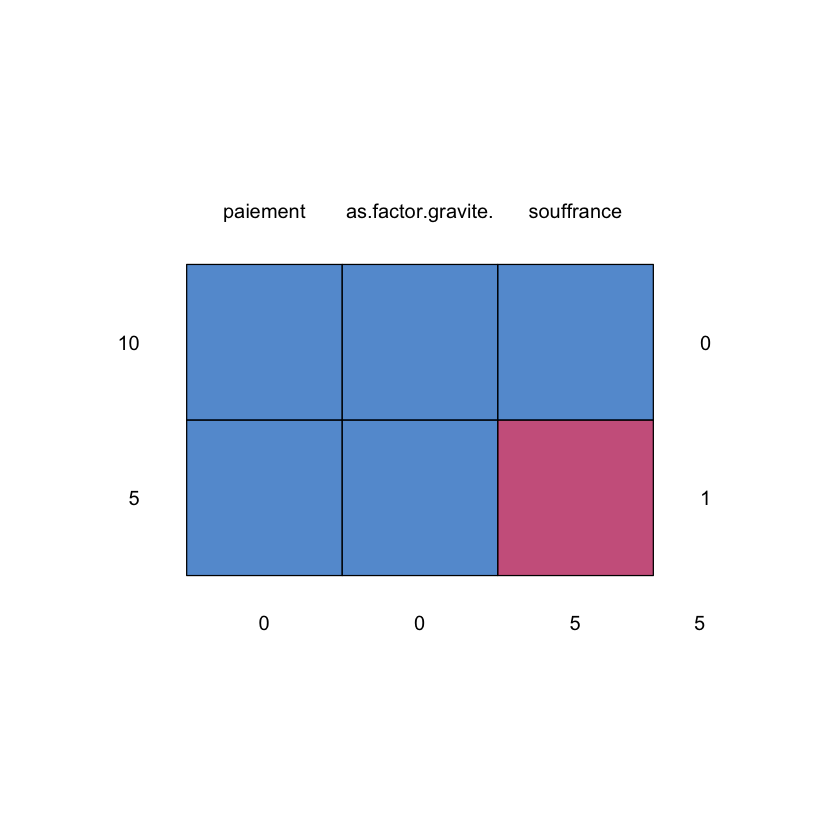

In [6]:
par(bg = "white")
mice::md.pattern(df, plot = TRUE)

In [7]:
data(nhanes)
head(nhanes)

,age,bmi,hyp,chl
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,NA,NA,NA
2,2,22.7,1,187
3,1,NA,1,187
4,3,NA,NA,NA
5,1,20.4,1,113
6,3,NA,NA,184


,age,hyp,bmi,chl,
13,1,1,1,1,0
3,1,1,1,0,1
1,1,1,0,1,1
1,1,0,0,1,2
7,1,0,0,0,3
,0,8,9,10,27


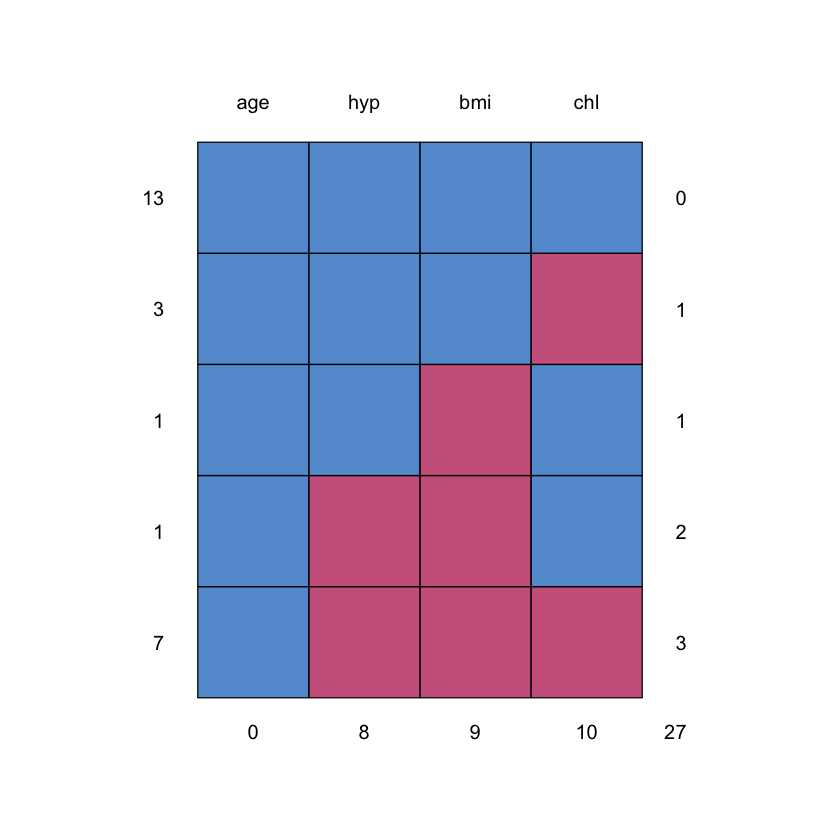

In [8]:
par(bg = "white")
mice::md.pattern(nhanes, plot = TRUE)

In [9]:
#-------------
# Student test
#-------------
t.test(nhanes$age[is.na(chl)], nhanes$age[!is.na(chl)], var.equal = FALSE)$p.val

ERROR: Error in t.test(nhanes$age[is.na(chl)], nhanes$age[!is.na(chl)], var.equal = FALSE): objet 'chl' introuvable


In [ ]:
mean(souffrance, na.rm = TRUE)
sd(souffrance, na.rm = TRUE) / sqrt(sum(missing))

[1] 2.5

[1] 0.6411795

In [ ]:
aggregate(souffrance ~ gravite, data = df, FUN = mean, na.rm = TRUE)

gravite,souffrance
<chr>,<dbl>
Cat,5.000000
Majeur,3.666667
Mineur,1.500000


In [ ]:
#------------------------------
# LM Model to replace NA values
#------------------------------
mod <- lm(souffrance ~ ., data = df)

In [ ]:
df[missing, 3] <- predict(mod, type = "response", newdata = df[missing, ])

In [ ]:
aggregate(souffrance ~ gravite, data = df, FUN = mean)

gravite,souffrance
<chr>,<dbl>
Cat,5.200000
Majeur,3.866667
Mineur,1.500000


In [ ]:
c(mean(df[, 3]), sd(df[, 3])/sqrt(15))

[1] 3.1866667 0.4076101

In [ ]:
df[missing, 3] <- NA
df[, 3] <- as.factor(df[, 3])

In [ ]:
#-------------------------------
# GLM Model to replace NA values
#-------------------------------
imp <- mice(df, m = 1, method = "polr", print = FALSE)
imp$imp
df_2 <- mice::complete(imp)
df_2$souffrance <- as.numeric(paste(df_2$souffrance))

$paiement
[1] 1
<0 lignes> (ou 'row.names' de longueur nulle)

$as.factor.gravite.
[1] 1
<0 lignes> (ou 'row.names' de longueur nulle)

$souffrance
   1
3  5
5  5
10 4
13 3
14 5

In [ ]:
c(mean(df_2$souffrance), sd(df_2$souffrance) / sqrt(15))

[1] 3.1333333 0.4007929

In [ ]:
#-----------------------------------------
# GLM Model to replace NA values Stochatic
#-----------------------------------------

set.seed(1095)
df_imp <- mice(df, m = 15, method = "polr", print = FALSE)
with(data = complete(df_imp), mean(as.numeric(paste(souffrance))))

[1] 3.133333

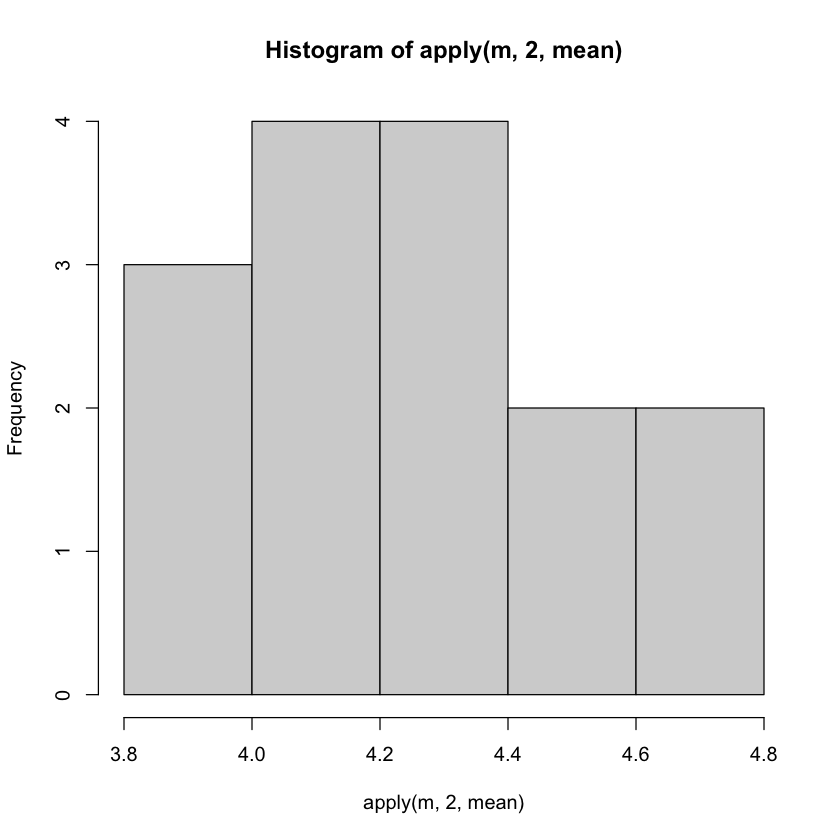

In [ ]:
m <- apply(apply(X = df_imp$imp$souffrance, 2, paste), 2, as.numeric)
par(bg = "white")
hist(apply(m, 2, mean))